In [1]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

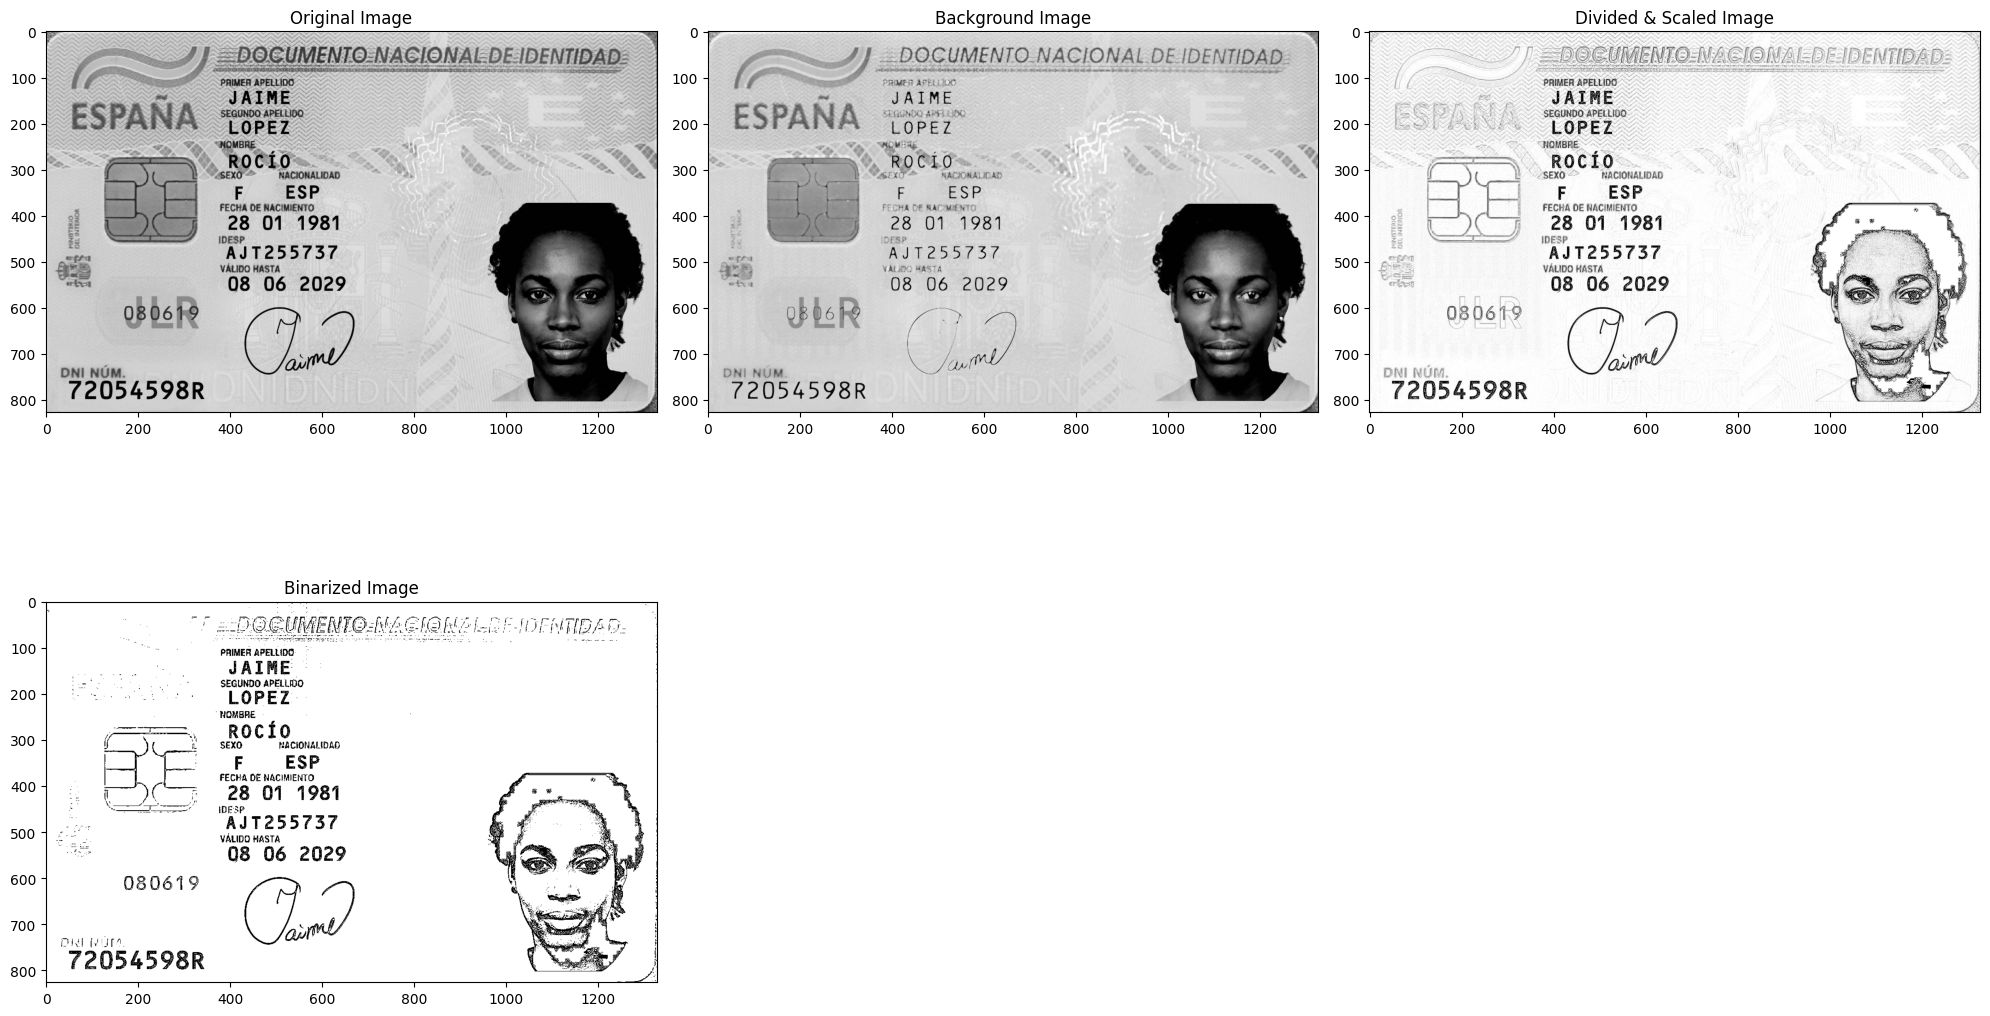

In [2]:
## Sample image
path = r'G:\10k\CV\try\69.jpg'

## Processing the image
image = cv2.imread(path) ## Reaading the img
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ## Converting to RGB
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (4,4)) ## Applying cross-shaped structuring element
bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se) ## Getting the background through dialtion
gray = cv2.divide(image, bg, scale=255) # Dividing the text from the backgroung and scaling the image
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1] ## Converting the image into binary format

# Display the results
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(bg, cmap='gray')
plt.title('Background Image')

plt.subplot(2, 3, 3)
plt.imshow(gray, cmap='gray')
plt.title('Divided & Scaled Image')

plt.subplot(2, 3, 4)
plt.imshow(binary, cmap='gray')
plt.title('Binarized Image')

plt.tight_layout()
plt.show()

In [3]:
## Applying OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(binary, lang='spa')

In [4]:
print(text)

PRIMER APELLIDO

JAIME

SEGUNDO APELLIDO

HOMBRE
z

Ú == E ms cl O comun
| F ESP
FECHA DE NACIMIENTO
í A F 28 01 1981
x= ¡DESP
AJT255737

VÁLIDO HASTA

ES 08 06 2029

080619 ÑO,
DIRE EJITA Qs

72054598R




In [5]:
# processing the output text
import pandas as pd
import re

info = {}

# First name
first_name = re.search(r'PRIMER APELLIDO\s+([\w]+)', text, re.IGNORECASE) ## Searching for the word followed by one or more white spaces with case being case insensitive
if first_name:
    info['PRIMER APELLIDO'] = first_name.group(1) ## Getting the first item of the output of the previous search

# Second name
second_name = re.search(r'SEGUNDO APELLIDO\s+([\w]+)', text, re.IGNORECASE)
if second_name:
    info['SEGUNDO APELLIDO'] = second_name.group(1)

# Gender
gender = re.search(r'SEGUNDO APELLIDO\s+[\w+]+\s+([\w]+)', text, re.IGNORECASE)
if gender:
    info['Género'] = gender.group(1)

print(info)

{'PRIMER APELLIDO': 'JAIME', 'SEGUNDO APELLIDO': 'HOMBRE', 'Género': 'z'}


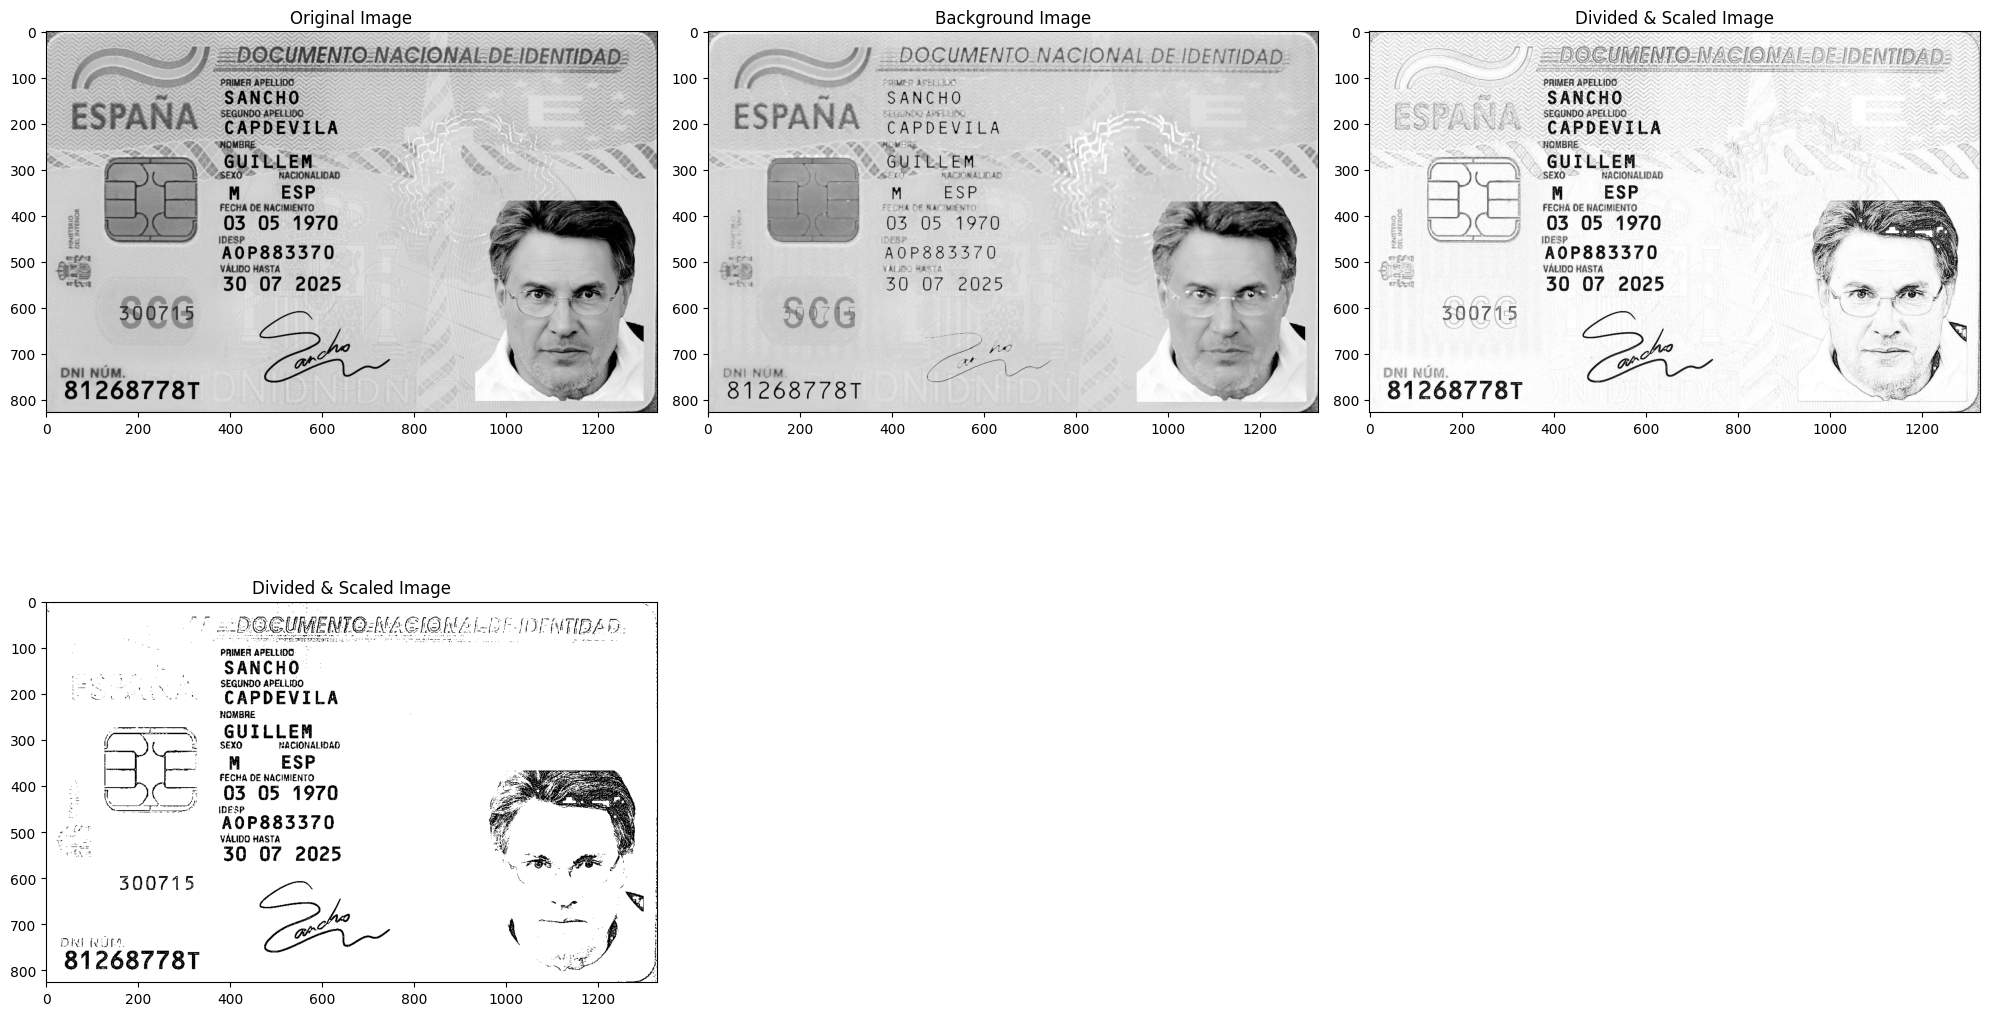

In [6]:
## Sample image
path = r'G:\10k\CV\try\93.jpg'

## Processing the image
image = cv2.imread(path) ## Reaading the img
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ## Converting to RGB
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4)) ## Applying cross-shaped 
bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
gray = cv2.divide(image, bg, scale=255)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1]

# Display the results
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(bg, cmap='gray')
plt.title('Background Image')

plt.subplot(2, 3, 3)
plt.imshow(gray, cmap='gray')
plt.title('Divided & Scaled Image')

plt.subplot(2, 3, 4)
plt.imshow(binary, cmap='gray')
plt.title('Divided & Scaled Image')

plt.tight_layout()
plt.show()

In [7]:
## Applying OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(binary, lang='spa')

In [8]:
print(text)

300715

DIE EgTA,

812687781

PRIMER APELLIDO

SANCHO

SEGUNDO APELLIDO

CAPDEVILA

NOMBRE

GUILLE

SEXO NACIONALIDAD

M ESP

FECHA DE NACIMIENTO
03 05 1970
DEZ
'A0P883370

VÁLIDO HASTA

30 07 2025

o

ae




In [9]:
# processing the output text
import pandas as pd
import re

info = {}

# First name
first_name = re.search(r'PRIMER APELLIDO\s+([\w]+)', text, re.IGNORECASE) ## Searching for the word followed by one or more white spaces with case being case insensitive
if first_name:
    info['Primer Apellido'] = first_name.group(1) ## Getting the first item of the output of the previous search

# Second name
second_name = re.search(r'SEGUNDO APELLIDO\s+([\w]+)', text, re.IGNORECASE)
if second_name:
    info['Segundo Apellido'] = second_name.group(1)

# Gender
gender = re.search(r'SEXO NACIONALIDAD\s+(\w)\s+\w+', text, re.IGNORECASE) # Capturing the M letter between two white spaces and before ESP
if gender:
    info['Género'] = gender.group(1)

# Nationality
nationality = re.search(r'NACIONALIDAD\s+\w+\s+([\w]+)', text, re.IGNORECASE)
if nationality:
    info['NACIONALIDAD'] = nationality.group(1)


# Date of birth
DoB = re.search('FECHA DE NACIMIENTO[/d]*\s+(\d{2})\s+(\d{2})\s+(\d{4})', text, re.IGNORECASE) # getting the day digits after zero or more charachters (not digits), then month and year after white space characters
if DoB:
    info['FECHA DE NACIMIENTO'] = f'{DoB.group(1)}/{DoB.group(2)}/{DoB.group(3)}'

# IDESP
ID = re.search(r"DE.*\n.*([A-Z0-9]{9})", text, re.IGNORECASE) # Getting line following DE starting wth any characters and contating 9 letters and digits 
if ID:
    info['IDESP'] = ID.group(1)

# Validation date
valid = re.search(r".*HASTA.*\n\s+(\d{2})\s+(\d{2})\s+(\d{4})", text, re.IGNORECASE) # Getting date digits separated by whitespaces and followed by line containing 'HASTA'
if valid:
    info['VÁLIDO HASTA'] = f'{valid.group(1)}/{valid.group(2)}/{valid.group(3)}'

# DNI number (at the bottom left)
DNI = re.search(r"([A-Z0-9]{9})", text, re.IGNORECASE) # Getting 9 charachters of A-Z and 0-9
if valid:
    info['DNI núm.'] = f'{DNI.group(1)}'

# Verification number (at the middle)
vnum = re.search(r"([0-9]{6})", text, re.IGNORECASE) # Getting 9 charachters of A-Z and 0-9
if valid:
    info['Número'] = f'{vnum.group(1)}'

print(info)
df = pd.DataFrame([info])
df

{'Primer Apellido': 'SANCHO', 'Segundo Apellido': 'CAPDEVILA', 'Género': 'M', 'NACIONALIDAD': 'ESP', 'FECHA DE NACIMIENTO': '03/05/1970', 'IDESP': 'A0P883370', 'VÁLIDO HASTA': '30/07/2025', 'DNI núm.': '812687781', 'Número': '300715'}


,Primer Apellido,Segundo Apellido,Género,NACIONALIDAD,FECHA DE NACIMIENTO,IDESP,VÁLIDO HASTA,DNI núm.,Número
0,SANCHO,CAPDEVILA,M,ESP,03/05/1970,A0P883370,30/07/2025,812687781,300715


#### Trying this code through sample images in a folder

In [10]:
## Getting image paths in a folder
import os
def get_all_file_paths(folder_path):
    file_paths = []
    for root, directories, files in os.walk(folder_path):
        for filename in files:
            file_path = os.path.join(root, filename)
            file_paths.append(file_path)
    return file_paths

# Define the folder path
folder_path = 'path/to/your/folder'

# Get all file paths
all_file_paths = get_all_file_paths(folder_path)

# Print all file paths
for path in all_file_paths:
    print(path)


In [12]:
get_all_file_paths(r'G:\10k\CV\8213348\original')

['G:\\10k\\CV\\8213348\\original\\00.jpg',
 'G:\\10k\\CV\\8213348\\original\\01.jpg',
 'G:\\10k\\CV\\8213348\\original\\02.jpg',
 'G:\\10k\\CV\\8213348\\original\\03.jpg',
 'G:\\10k\\CV\\8213348\\original\\04.jpg',
 'G:\\10k\\CV\\8213348\\original\\05.jpg',
 'G:\\10k\\CV\\8213348\\original\\06.jpg',
 'G:\\10k\\CV\\8213348\\original\\07.jpg',
 'G:\\10k\\CV\\8213348\\original\\08.jpg',
 'G:\\10k\\CV\\8213348\\original\\09.jpg',
 'G:\\10k\\CV\\8213348\\original\\10.jpg',
 'G:\\10k\\CV\\8213348\\original\\11.jpg',
 'G:\\10k\\CV\\8213348\\original\\12.jpg',
 'G:\\10k\\CV\\8213348\\original\\13.jpg',
 'G:\\10k\\CV\\8213348\\original\\14.jpg',
 'G:\\10k\\CV\\8213348\\original\\15.jpg',
 'G:\\10k\\CV\\8213348\\original\\16.jpg',
 'G:\\10k\\CV\\8213348\\original\\17.jpg',
 'G:\\10k\\CV\\8213348\\original\\18.jpg',
 'G:\\10k\\CV\\8213348\\original\\19.jpg',
 'G:\\10k\\CV\\8213348\\original\\20.jpg',
 'G:\\10k\\CV\\8213348\\original\\21.jpg',
 'G:\\10k\\CV\\8213348\\original\\22.jpg',
 'G:\\10k\\

In [14]:
### Splitting the code above into functions
def process_image(path):
    image = cv2.imread(path) ## Reaading the img
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ## Converting to RGB
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4)) ## Applying cross-shaped 
    bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    gray = cv2.divide(image, bg, scale=255)
    binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1]
    pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    text = pytesseract.image_to_string(binary, lang='spa')
    return text

In [18]:
# Getting all texts from images
def get_info(text):
    info = {}

    # First name
    first_name = re.search(r'PRIMER APELLIDO\s+([\w]+)', text, re.IGNORECASE) ## Searching for the word followed by one or more white spaces with case being case insensitive
    if first_name:
        info['Primer Apellido'] = first_name.group(1) ## Getting the first item of the output of the previous search

    # Second name
    second_name = re.search(r'SEGUNDO APELLIDO\s+([\w]+)', text, re.IGNORECASE)
    if second_name:
        info['Segundo Apellido'] = second_name.group(1)

    # Gender
    gender = re.search(r'SEXO NACIONALIDAD\s+(\w)\s+\w+', text, re.IGNORECASE) # Capturing the M letter between two white spaces and before ESP
    if gender:
        info['Género'] = gender.group(1)

    # Nationality
    nationality = re.search(r'NACIONALIDAD\s+\w+\s+([\w]+)', text, re.IGNORECASE)
    if nationality:
        info['NACIONALIDAD'] = nationality.group(1)


    # Date of birth
    DoB = re.search('FECHA DE NACIMIENTO[/d]*\s+(\d{2})\s+(\d{2})\s+(\d{4})', text, re.IGNORECASE) # getting the day digits after zero or more charachters (not digits), then month and year after white space characters
    if DoB:
        info['FECHA DE NACIMIENTO'] = f'{DoB.group(1)}/{DoB.group(2)}/{DoB.group(3)}'

    # IDESP
    ID = re.search(r"DE.*\n.*([A-Z0-9]{9})", text, re.IGNORECASE) # Getting line following DE starting wth any characters and contating 9 letters and digits 
    if ID:
        info['IDESP'] = ID.group(1)

    # Validation date
    valid = re.search(r".*HASTA.*\n\s+(\d{2})\s+(\d{2})\s+(\d{4})", text, re.IGNORECASE) # Getting date digits separated by whitespaces and followed by line containing 'HASTA'
    if valid:
        info['VÁLIDO HASTA'] = f'{valid.group(1)}/{valid.group(2)}/{valid.group(3)}'

    # DNI number (at the bottom left)
    DNI = re.search(r"([A-Z0-9]{9})", text, re.IGNORECASE) # Getting 9 charachters of A-Z and 0-9
    if valid:
        info['DNI núm.'] = f'{DNI.group(1)}'

    # Verification number (at the middle)
    vnum = re.search(r"([0-9]{6})", text, re.IGNORECASE) # Getting 9 charachters of A-Z and 0-9
    if valid:
        info['Número'] = f'{vnum.group(1)}'
    
    return info

In [15]:
### getting all text info from images
images_text = []
for path in get_all_file_paths(r'G:\10k\CV\8213348\original'):
    images_text.append(process_image(path))
print(images_text)

['140915\n\nDIE REGTA,\n\n48518051Y\n\nPRIMER APELLIDO\n\nAR AORTA E\n\nCALERO\n\nSEGUNDO APELLIDO\n\nNOMBRE\n\nALONSO\n\nSEXO NACIONALIDAD\n\nESP\n\nFECHA DE NÁCIMIENTO\n\n31 01 1971\nDER\nAXT103442\n\nVÁLIDO HASTA\n\n14 09 2025\n\n', '190417\n\nDIE OJTA.\n\n74586356W\n\nPRIMER APELLIDO\n\nMUÑOZ:\n\nSEGUNDO APELLIDO\n\nHOMBRE\n\nANDRÉS\n\nSEXO RACIONALIDAD\n\nM ESP\n\nFECHA DE NACIMIENTO\n28 08 1973\n\nDesp\nAAP533814\n\nVÁLIDO HASTA\n\n19 04 2027\n\ne\n\n', '040917\n\nDINO.\n\n60240839R\n\nMEDRANO\n\nSEGUNDO APELLIDO\nRASTROJO\n\nHOMBRE\n\nORIOL\n\nSEXO RACIONALIDAD\n\nESP\n\nFECHA DE NACIMIENTO\n\n14 11 1980\nDEX\nANT621548\n\nVÁLIDO HASTA\n\n04 09 2027\n\ndidano 2 —\n\nUMENTONACIONA\n\nPRIMER APELLIDO\n\nCEIOPRTIDER.\n\n', 'PRIMER APELLIDO\n\nVALDES\n\nES SEGUNDO APELLIDO\nHOMBRE\n\nSEXO NACIONALIDAD\n\nM ESP\n\nFECHA DE NÁCIMIENTO\n\n28 10 1999\nDesp\nAUM169556\n\nVÁLIDO HASTA\n\n24 11 2029\n\n241119\n\nDIE REgTA. S\n\n89258875R\n\n', '090318\n\nDIE REUTA,\n\n388294861\n\nPRIMER A

In [19]:
### Creating dataframe of all image texts
data =  [get_info(text) for text in images_text]
df = pd.DataFrame(data)
df

,Primer Apellido,Segundo Apellido,NACIONALIDAD,IDESP,VÁLIDO HASTA,DNI núm.,Número,FECHA DE NACIMIENTO,Género
0,AR,NOMBRE,FECHA,AXT103442,14/09/2025,48518051Y,140915,NaN,NaN
1,MUÑOZ,HOMBRE,NaN,AAP533814,19/04/2027,74586356W,190417,28/08/1973,NaN
2,CEIOPRTIDER,RASTROJO,NaN,ANT621548,04/09/2027,60240839R,040917,14/11/1980,NaN
3,VALDES,HOMBRE,ESP,AUM169556,24/11/2029,NACIONALI,169556,NaN,M
4,SIMÓN,NOMBRE,FECHA,AIJ293151,09/03/2028,388294861,090318,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,REGALADO,CANO,ESP,NaN,12/01/2025,27167886L,120115,26/08/1965,NaN
96,ESQUIBEL,HOMBRE,NaN,ALI721522,03/09/2027,RACIONALI,721522,NaN,NaN
97,CAMARILLO,so,NaN,AQTI72988,04/09/2025,CAMARILLO,040915,29/06/1969,NaN
98,DOS,HOMBRE,NaN,ATA154842,05/06/2028,66746180K,050618,29/05/1968,NaN


In [20]:
# Converting to CSV
df.to_csv('data.csv', index=False)